In [6]:
import rasterstats as rs
import geopandas as gpd
import rasterio as rio
import cartopy.crs as ccrs
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.crs import CRS
import earthpy as et
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [67]:
def reproject_raster(raster,dst_crs,band=1):
    transform, width, height = calculate_default_transform(raster.crs, dst_crs, raster.width, raster.height, *raster.bounds)
    kwargs = raster.meta.copy()

    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
    # out_np = raster.read(band).T
    out_np = np.zeros((height,width))
    reproject(
    source=rio.band(raster, band),
    destination=out_np,
    src_transform=raster.transform,
    src_crs=raster.crs,
    dst_transform=transform,
    dst_crs=dst_crs,
    resampling=Resampling.nearest)
    return out_np,kwargs

In [68]:
crop_rs = rio.open('data/cropland.tif')
# moll = '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m no_defs'
# moll = '+proj=moll +datum=WGS84'
moll = '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'
crop_mol,crop_params = reproject_raster(crop_rs,dst_crs=CRS.from_proj4(moll))

In [62]:
type(crop_mol)

numpy.ndarray

In [54]:
transform, width, height = calculate_default_transform(crop_rs.crs, moll, crop_rs.width, crop_rs.height, *crop_rs.bounds)

In [55]:
crop_rs.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028234663852886e+38,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.08332825, 0.0, -180.0,
        0.0, -0.08332825, 89.98902000000001)}

In [58]:
transform

Affine(3735.081508998772, 0.0, -18032710.32543957,
       0.0, -3735.0041781186683, 9020047.848073646)

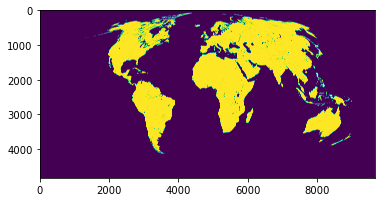

In [69]:
plt.imshow(crop_mol)

In [10]:
pasture_rs = rio.open('data/pasture.tif')
moll = '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m no_defs'
pasture_mol,pasture_params = reproject_raster(pasture_rs,moll)

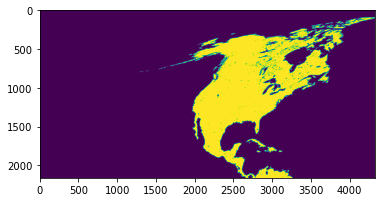

In [11]:
plt.imshow(pasture_mol)

In [15]:
teow_df = gpd.read_file('data/terr_eco_regions/tnc_terr_ecoregions.shp')
teow_df_mol = teow_df.to_crs(ccrs.Mollweide().proj4_init)

In [39]:
mean_crop_gdf = gpd.GeoDataFrame.from_features(rs.zonal_stats(teow_df_mol,crop_mol,nodata=crop_rs.profile['nodata'],affine=crop_params['transform'],geojson_out=True,copy_properties=True,stats='mean'))
mean_pasture_gdf = gpd.GeoDataFrame.from_features(rs.zonal_stats(teow_df_mol,pasture_mol,nodata=pasture_rs.profile['nodata'],affine=pasture_params['transform'],geojson_out=True,copy_properties=True,stats='mean'))

In [42]:
mean_crop_gdf['crop_area'] = mean_crop_gdf['mean']*mean_crop_gdf.area
mean_pasture_gdf['pasture_area'] = mean_pasture_gdf['mean']*mean_pasture_gdf.area


,CLS_CODE,ECODE_NAME,ECO_CODE,ECO_ID_U,ECO_NAME,ECO_NOTES,ECO_NUM,ER_DATE_U,ER_RATION,ER_UPDATE,RealmMHT,SOURCEDATA,WWF_MHTNAM,WWF_MHTNUM,WWF_REALM,WWF_REALM2,geometry,mean,crop_area
0,0,AA0101. Admiralty Islands lowland rain forests,AA0101,10000,Admiralty Islands Lowland Rain Forests,None,1,None,None,None,AA1,"Olson, 2001",Tropical and Subtropical Moist Broadleaf Forests,1,AA,Australasia,"MULTIPOLYGON (((14752423.934 -318477.953, 1475...",0.028412,6.002870e+07
1,0,AA0102. Banda Sea Islands moist deciduous forests,AA0102,10001,Banda Sea Islands Moist Deciduous Forests,None,2,None,None,None,AA1,"Olson, 2001",Tropical and Subtropical Moist Broadleaf Forests,1,AA,Australasia,"MULTIPOLYGON (((12769497.209 -1014713.760, 127...",0.315464,2.380223e+09
2,0,AA0103. Biak-Numfoor rain forests,AA0103,10002,Biak-Numfoor Rain Forests,None,3,None,None,None,AA1,"Olson, 2001",Tropical and Subtropical Moist Broadleaf Forests,1,AA,Australasia,"MULTIPOLYGON (((13649818.079 -157163.754, 1364...",0.147500,4.172452e+08
3,0,AA0104. Buru rain forests,AA0104,10003,Buru Rain Forests,None,4,None,None,None,AA1,"Olson, 2001",Tropical and Subtropical Moist Broadleaf Forests,1,AA,Australasia,"MULTIPOLYGON (((12732307.072 -472981.196, 1273...",0.160922,1.390989e+09
4,0,AA0105. Central Range montane rain forests,AA0105,10004,Central Range Montane Rain Forests,None,5,None,None,None,AA1,"Olson, 2001",Tropical and Subtropical Moist Broadleaf Forests,1,AA,Australasia,"POLYGON ((13721833.187 -369977.409, 13723716.8...",0.076809,1.324015e+10
5,0,AA0106. Halmahera rain forests,AA0106,10005,Halmahera Rain Forests,None,6,None,None,None,AA1,"Olson, 2001",Tropical and Subtropical Moist Broadleaf Forests,1,AA,Australasia,"MULTIPOLYGON (((12787895.633 -227676.996, 1278...",0.112035,3.016729e+09
6,0,AA0107. Huon Peninsula montane rain forests,AA0107,10006,Huon Peninsula Montane Rain Forests,None,7,None,None,None,AA1,"Olson, 2001",Tropical and Subtropical Moist Broadleaf Forests,1,AA,Australasia,"POLYGON ((14557642.744 -677572.912, 14564192.9...",0.036943,6.117402e+08
7,0,AA0109. Lord Howe Island subtropical forests,AA0109,10007,Lord Howe Island Subtropical Forests,None,9,None,None,None,AA1,"Olson, 2001",Tropical and Subtropical Moist Broadleaf Forests,1,AA,Australasia,"POLYGON ((14440869.184 -3821674.236, 14440679....",NaN,NaN
8,0,AA0110. Louisiade Archipelago rain forests,AA0110,10008,Louisiade Archipelago Rain Forests,None,10,None,None,None,AA1,"Olson, 2001",Tropical and Subtropical Moist Broadleaf Forests,1,AA,Australasia,"MULTIPOLYGON (((15174769.799 -1400670.677, 151...",0.005778,9.346682e+06
9,0,AA0111. New Britain-New Ireland lowland rain f...,AA0111,10009,New Britain-New Ireland Lowland Rain Forests,None,11,None,None,None,AA1,"Olson, 2001",Tropical and Subtropical Moist Broadleaf Forests,1,AA,Australasia,"MULTIPOLYGON (((14769918.689 -674518.050, 1477...",0.028637,1.006825e+09


In [61]:
merge_df = mean_crop_gdf.copy()
merge_df['pasture_area'] = mean_pasture_gdf['pasture_area']
biome_area = merge_df.groupby('WWF_MHTNAM').apply(lambda x: x.area.sum())
biome_sum = merge_df.groupby('WWF_MHTNAM')[['crop_area','pasture_area']].sum()
biome_sum['tot_area'] = biome_area
crop_area = biome_sum['crop_area'].sum()
pasture_area = biome_sum['pasture_area'].sum()
natural_biome_area = (biome_sum['tot_area']-biome_sum['pasture_area']-biome_sum['crop_area'])

In [69]:
natural_biome_area.loc['Crops'] = crop_area
natural_biome_area.loc['Pasture'] = pasture_area
natural_biome_area

WWF_MHTNAM
Boreal Forests/Taiga                                            1.568720e+13
Deserts and Xeric Shrublands                                    1.965379e+13
Flooded Grasslands and Savannas                                 6.224692e+11
Inland Water                                                    4.627969e+11
Mangroves                                                       2.408518e+11
Mediterranean Forests, Woodlands and Scrub                      1.623844e+12
Montane Grasslands and Shrublands                               3.049803e+12
Rock and Ice                                                    1.082553e+13
Temperate Broadleaf and Mixed Forests                           7.363118e+12
Temperate Conifer Forests                                       3.395185e+12
Temperate Grasslands, Savannas and Shrublands                   2.374890e+12
Tropical and Subtropical Coniferous Forests                     4.107531e+11
Tropical and Subtropical Dry Broadleaf Forests                  2